In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cv2 import cv2 as cv

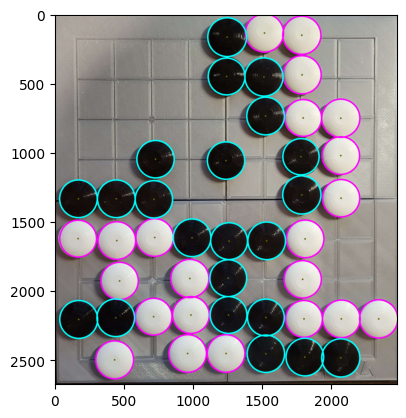

In [103]:
synthetic_board = False
path = '../data/board.png' if synthetic_board else '../data/board_real.jpg'
min_radius, max_radius = (0, 100) if synthetic_board else (100, 150)
min_dist = 50 if synthetic_board else 100
blur_size = 5 if synthetic_board else 11

img = cv.imread(path)

if not synthetic_board:
    img = img[150:-200, 300:-250]

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred = cv.medianBlur(gray, blur_size)
circles = cv.HoughCircles(blurred, cv.HOUGH_GRADIENT, 2, min_dist, param1=100, param2=100, minRadius=min_radius, maxRadius=max_radius)

circles = np.uint16(np.around(circles)).squeeze()

circles_color = []
for c in circles:
    x, y, r = c
    x, y, r = int(x), int(y), int(r)
    bx, by = x - r, y - r
    bxx, byy = x + r, y + r

    bx = max(bx, 0)
    by = max(by, 0)

    px = blurred[by:byy, bx:bxx]
    is_white = np.mean(px) > 127
    circles_color.append(is_white)

for i, c in enumerate(circles):
    center = (c[0], c[1])
    radius = c[2]
    color = (255, 0, 255) if circles_color[i] else (255, 255, 0)

    cv.circle(img, center, 1, (0, 100, 100), 10)
    cv.circle(img, center, radius, color, 10)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))